# Making things simpler with MOABB (Part 2)

We extend the previous example to a case where we want to analyse the score of a classifier with three different MI datasets instead of just one. As before, we begin by importing all relevant libraries.

In [2]:
%matplotlib inline

import moabb
from moabb.datasets import BNCI2014001, Weibo2014, Zhou2016
from moabb.paradigms import LeftRightImagery
from moabb.evaluations import WithinSessionEvaluation

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline

from mne.decoding import CSP

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

moabb.set_log_level('info')
import warnings
warnings.filterwarnings("ignore")

import mne
mne.set_log_level("CRITICAL")

Then, we instantiate the three diferent datasets that interest us; they all follow the MI paradigm (with left-hand/right-hand classes) but were recorded with different number of electrodes, different number of trials, etc.

In [5]:
datasets = [Zhou2016(), BNCI2014001()]

The following lines go exactly as in the previous example, where we end up obtaining a `pandas` dataframe containing the results of the evaluation.

In [6]:
paradigm = LeftRightImagery()
evaluation = WithinSessionEvaluation(paradigm=paradigm, datasets=datasets, overwrite=False)
pipeline = make_pipeline(CSP(n_components=8), LDA())
results = evaluation.process({'csp+lda':pipeline}) 
results.to_csv('../results/results_part2-2.csv')

2019-09-16 15:06:39 tug-swl-f195.tugraz.at root[2714] INFO Processing dataset: Zhou 2016
2019-09-16 15:06:49 tug-swl-f195.tugraz.at root[2714] INFO csp+lda | Zhou 2016 | 1 | session_0: Score 0.873
2019-09-16 15:06:50 tug-swl-f195.tugraz.at root[2714] INFO csp+lda | Zhou 2016 | 1 | session_1: Score 0.912
2019-09-16 15:06:50 tug-swl-f195.tugraz.at root[2714] INFO csp+lda | Zhou 2016 | 1 | session_2: Score 0.970
2019-09-16 15:06:57 tug-swl-f195.tugraz.at root[2714] INFO csp+lda | Zhou 2016 | 2 | session_0: Score 0.882
2019-09-16 15:06:58 tug-swl-f195.tugraz.at root[2714] INFO csp+lda | Zhou 2016 | 2 | session_1: Score 0.783
2019-09-16 15:06:59 tug-swl-f195.tugraz.at root[2714] INFO csp+lda | Zhou 2016 | 2 | session_2: Score 0.800
2019-09-16 15:07:07 tug-swl-f195.tugraz.at root[2714] INFO csp+lda | Zhou 2016 | 3 | session_0: Score 0.968
2019-09-16 15:07:08 tug-swl-f195.tugraz.at root[2714] INFO csp+lda | Zhou 2016 | 3 | session_1: Score 0.950
2019-09-16 15:07:09 tug-swl-f195.tugraz.at root

Once again, we plot the results using the `seaborn` library. Note how easy it is to plot the results from the three datasets with just one line. 

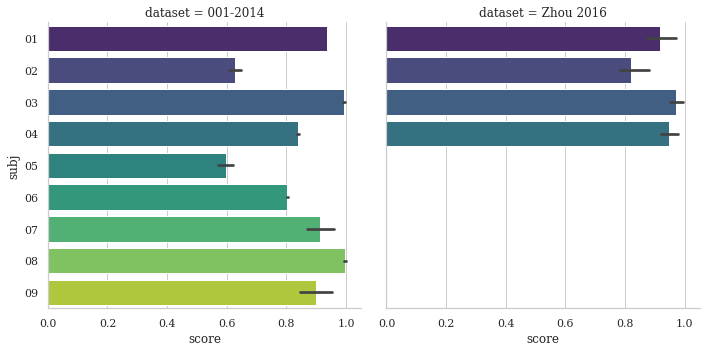

In [7]:
results = pd.read_csv('../results/results_part2-2.csv')
results["subj"] = [str(resi).zfill(2) for resi in results["subject"]]
g = sns.catplot(kind='bar', x="score", y="subj", col="dataset", data=results, orient='h', palette='viridis')